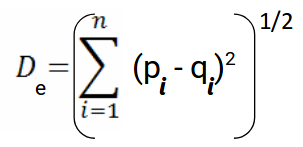

In [1]:
from math import sqrt
def euclidean_distance(row1,row2):
  distance =0.0
  for i in range(len(row1)-1):
    distance += (row1[i] - row2[i])**2
  return sqrt(distance)


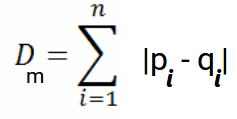

In [24]:
def manhattan_distance(row1,row2):
  distance =0.0
  for i in range(len(row1)-1):
    distance += abs(row1[i] - row2[i])
  return distance

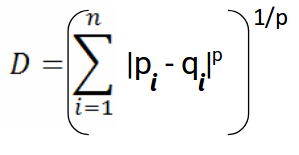

In [26]:
def minkowski_distance(row1,row2,p):
  distance =0.0
  for i in range(len(row1)-1):
    distance += (row1[i] - row2[i])**p
  return distance**(1/p)  


In [2]:
dataset =[[2.78,2.55,0],[1.46,2.36,0],[3.40,4.40,0],[1.39,1.85,0],[3.06,3.00,0],[7.63,2.76,1],[5.33,2.09,1],[6.92,1.78,1],[8.67,-0.24,1],[7.67,3.51,1]]


In [28]:
row0 = dataset[0]
for row in dataset:
  distance = minkowski_distance(row0,row,3)
  print(distance)

0.0
1.3213108725389562
(0.9364632925278867+1.6220020020815356j)
1.4468212569078167
(0.24178429997835577+0.41878269203498664j)
(2.4250656162498183+4.200336859033014j)
(1.2725002669692191+2.2040351150356474j)
(2.065551086339251+3.5776394271686707j)
(2.8367334056990225+4.913366386198603j)
(2.45115109729508+4.245518237543282j)


In [25]:
row0 = dataset[0]
for row in dataset:
  distance = manhattan_distance(row0,row)
  print(distance)

0.0
1.5099999999999998
2.4700000000000006
2.09
0.7300000000000004
5.06
3.0100000000000002
4.91
8.68
5.8500000000000005


In [4]:
def get_neighbors(train,test_row,num_neighbors):
  distances = list()
  for train_row in train:
    dist = euclidean_distance(test_row,train_row)
    distances.append((train_row,dist))
  distances.sort(key=lambda tup: tup[1])
  neighbors = list()
  for i in range(num_neighbors):
    neighbors.append(distances[i][0])
  return neighbors



In [7]:
neighbors = get_neighbors(dataset,dataset[0],3)
for neighbor in neighbors:
  print(neighbor)

[2.78, 2.55, 0]
[3.06, 3.0, 0]
[1.46, 2.36, 0]


In [8]:
def predict_classification(train,test_row,num_neighbors):
  neighbors = get_neighbors(train,test_row,num_neighbors)
  output_values = [row[-1] for row in neighbors]
  prediction = max(set(output_values),key=output_values.count)
  return prediction

In [9]:
prediction = predict_classification(dataset,dataset[0],3)
print(prediction)

0


In [10]:
def predict_regression(train,test_row,num_neighbors):
  neighbors = get_neighbors(train,test_row,num_neighbors)
  output_values = [row[-1] for row in neighbors]
  prediction = sum(output_values),float(len(output_values))
  return prediction

In [15]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt

def load_csv(filename):
  dataset = list()
  with open(filename,'r') as file:
    csv_reader = reader(file)
    next(csv_reader)
    for row in csv_reader:
      if not row:
        continue
      dataset.append(row[0].split(';'))
  return dataset
def accuracy_metric(actual,predicted):
  correct=0
  for i in range(len(actual)):
     if actual[i] == predicted[i]:
      correct +=1
  return correct/float(len(actual)) * 100.0
def str_column_to_int(dataset,column):
  class_values = [row[column] for row in dataset]
  unique = set(class_values)
  lookup = dict()
  for i, value in enumerate(unique):
    lookup[value] = i
  for row in dataset:
    row[column] = lookup[row[column]]
  return lookup
def str_column_to_float(dataset,column):
  for row in dataset:
    row[column]=float(row[column].strip())
def dataset_minmax(dataset):
  minmax = list()
  for i in range(len(dataset[0])):
    col_values = [row[i] for row in dataset]
    value_min = min(col_values)
    value_max = max(col_values)
    minmax.append([value_min,value_max])
  return minmax

def normalize_dataset(dataset, minmax):
  for row in dataset:
    for i in range(len(row)):
      row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
def cross_validation_split(dataset,n_folds):
  dataset_split = list()
  dataset_copy = list(dataset)
  fold_size = int(len(dataset)/n_folds)
  for _ in range(n_folds):
    fold = list()
    while len(fold) < fold_size:
      index = randrange(len(dataset_copy))
      fold.append(dataset_copy.pop(index))
    dataset_split.append(fold)
  return dataset_split
  
def evaluate_algorithm(dataset,algorithm,n_folds,*args):
  folds = cross_validation_split(dataset,n_folds)
  scores = list()
  for fold in folds:
    train_set = list(folds)
    train_set.remove(fold)
    train_set = sum(train_set,[])
    test_set = list()
    for row in fold:
      row_copy = list(row)
      test_set.append(row_copy)
      row_copy[-1] = None
    predicted = algorithm(train_set,test_set,*args)
    actual = [row[-1] for row in fold]
    accur = accuracy_metric(actual,predicted)
    scores.append(accur)
  return scores


In [12]:
def KNN(train,test,num_neighbors):
  predictions = list()
  for row in test:
    output = predict_classification(train,row,num_neighbors)
    predictions.append(output)
  return (predictions)


In [13]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
data=np.concatenate([iris.data,np.expand_dims(iris.target,1)],axis=1)
data = data.tolist()

In [23]:
seed(1)


n_folds = 5
num_neighbors = 6
minmax = dataset_minmax(data)
normalize_dataset(data,minmax)
scores = evaluate_algorithm(data,KNN,n_folds,num_neighbors)

print("Scores = %s"%scores)
print("Mean Accuracy : %.3f"%(sum(scores)/float(len(scores))))

Scores = [90.0, 100.0, 100.0, 96.66666666666667, 96.66666666666667]
Mean Accuracy : 96.667
